In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [6]:
import pandas as pd
data=pd.read_csv('/kaggle/input/regressionmodel9/Mall_Customers.csv')

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [8]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [9]:
numeric = ["Gender"]

In [10]:
from sklearn.preprocessing import Normalizer
import pandas as pd
numeric_cols = data.select_dtypes(include=['number']).columns
categorical_cols = data.select_dtypes(exclude=['number']).columns
norm = Normalizer()
data_numeric = pd.DataFrame(norm.fit_transform(data[numeric_cols]), columns=numeric_cols)
data_final = pd.concat([data_numeric, data[categorical_cols].reset_index(drop=True)], axis=1)
data_final.head()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Gender
0,0.021780,0.413826,0.326705,0.849433,Male
1,0.023520,0.246956,0.176397,0.952546,Male
2,0.113308,0.755390,0.604312,0.226617,Female
3,0.048759,0.280363,0.195035,0.938606,Female
4,0.093250,0.578153,0.317052,0.746004,Female


In [11]:
import pandas as pd
from sklearn.cluster import KMeans
data_numeric = pd.get_dummies(data)
kmeans = KMeans(n_clusters=2, n_init='auto', random_state=42)
kmeans.fit(data_numeric)
pred = kmeans.predict(data_numeric)

In [12]:
pred;len(pred)

200

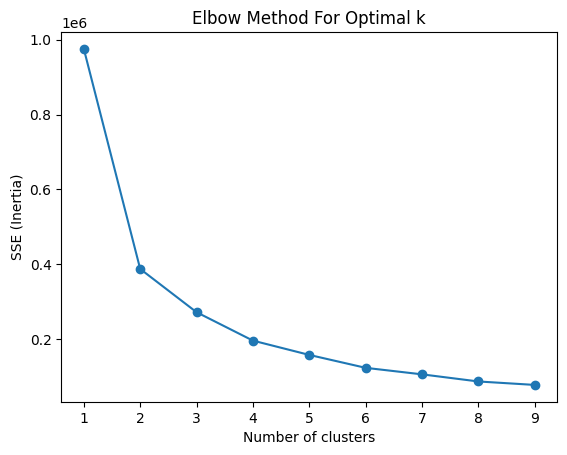

In [17]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


data_numeric = pd.get_dummies(data)

SSE = []
for cluster in range(1, 10):
    kmeans = KMeans(n_clusters=cluster, n_init=10, random_state=42)
    kmeans.fit(data_numeric)
    SSE.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.plot(range(1, 10), SSE, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('SSE (Inertia)')
plt.title('Elbow Method For Optimal k')
plt.show()